# Álvaro huertas García


Adaboost, like Random Forest, is an ensemble method. However, it employs sorters that work in series rather than in parallel. Each classifier receive a weight associated with each input. Initially, the weigths are 1/N. The weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. The loss function error is a exponential one, which is an upper-bound of the classification error. This characteristic allows Adaboost to keep reducing the test error even if the train error is 0. For that reason we will try this classifier trying to improve the best performance obtained with TF-IDF vectorizer. 

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [0]:

COLAB = True

if COLAB:
    import urllib
    # Data
    urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1OXY-FUtKRqMsZKyKsCQwh_jXkgNXh2QN",
                              "data_TF_IDF.pkl")


In [0]:
# Getting back the objects:
with open('data_TF_IDF.pkl', "rb") as f: 
    train_vec, test_vec, y_train, y_test = pickle.load(f)

In [27]:
param_grid = {'C': np.logspace(-3, 1, 6)} 

gs_Lr = GridSearchCV(LogisticRegression(penalty='l1', max_iter=1000, n_jobs=-1, solver = "liblinear"), cv=5, param_grid=param_grid)
gs_Lr.fit(train_vec, y_train)

# predict the labels on validation dataset
predictions_Lr = gs_Lr.predict(train_vec)


print("Train Accuracy Score -> ",accuracy_score(y_train, predictions_Lr)*100)

predictions_Lr = gs_Lr.predict(test_vec)
# Use accuracy_score function to get the accuracy
print('Best C Parameter: %.2g' % gs_Lr.best_params_['C'])
print("Logistic Regression Lasso L1 Accuracy Score -> ",accuracy_score(y_test, predictions_Lr)*100)
print(classification_report(y_test, predictions_Lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Train Accuracy Score ->  92.2
Best C Parameter: 1.6
Logistic Regression Lasso L1 Accuracy Score ->  92.13333333333334
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       300
           1       0.98      0.92      0.95       300
           2       0.92      0.89      0.91       300
           3       0.93      0.92      0.92       300
           4       0.82      0.94      0.87       300

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.93      0.92      0.92      1500



In [175]:
param = list(sorted(set(np.array(np.exp(np.arange(0, np.log(100), 0.15)), dtype=int))))
# param = np.arange(1, 50, 2, dtype=int).tolist()
print(param)

test_accuracies = np.zeros( len(param) )
train_accuracies = np.zeros( len(param) )


for i in range(len(param)): # me dirá el array que quiero rellenar
        clf = AdaBoostClassifier(n_estimators= param[ i ], random_state=0)
        clf.fit(train_vec, y_train)

        test_accuracies[i] = accuracy_score(clf.predict(test_vec),  y_test)
        train_accuracies[i] =  accuracy_score(clf.predict(train_vec), y_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 17, 20, 23, 27, 31, 36, 42, 49, 57, 66, 77, 90]


In [180]:
print("Best number of estimators", param[np.argmax(train_accuracies)])
print("Adabost Train Accuracy", np.max(train_accuracies))

print("Best number of estimators", param[np.argmax(test_accuracies)])
print("Adabost Test Accuracy", np.max(test_accuracies))

Best number of estimators 6
Adabost Train Accuracy 0.9125714285714286
Best number of estimators 6
Adabost Test Accuracy 0.9153333333333333


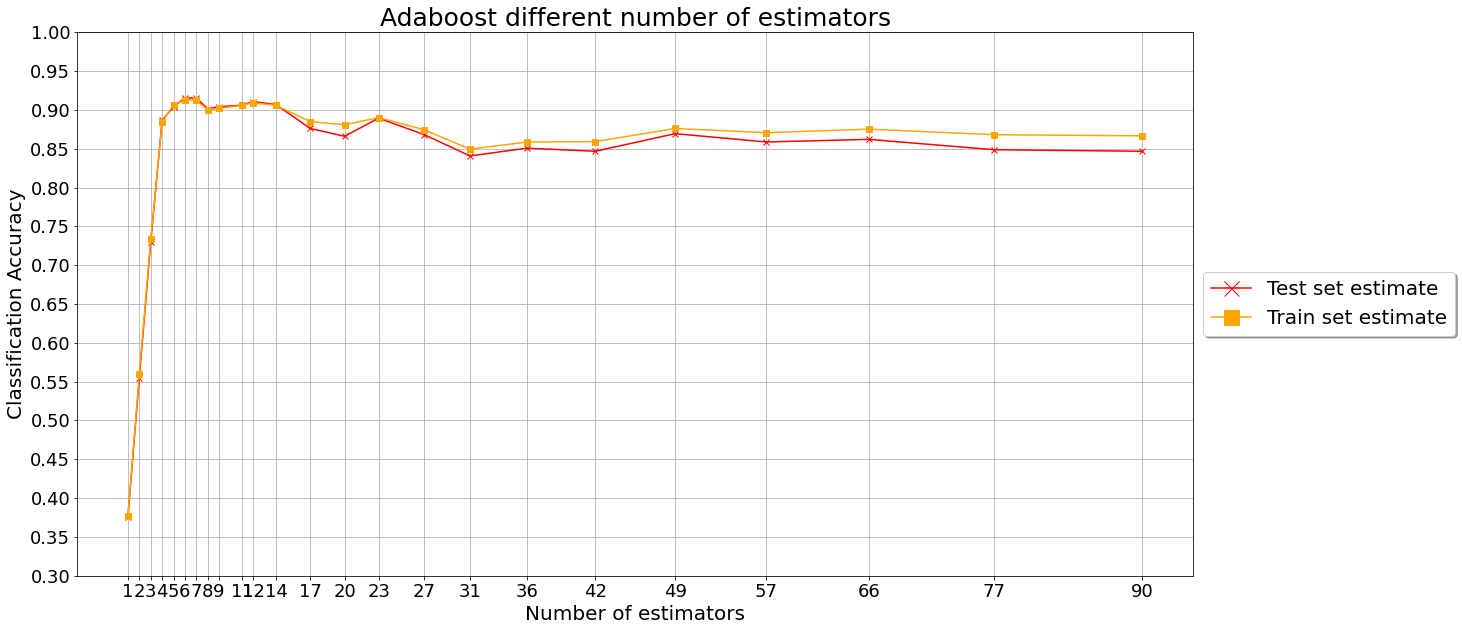

In [177]:

# plt.figure(figsize = (12, 8))

plt.figure(figsize = (20, 10))
# line1, = plt.plot(param, wdbc_accuracies[i], 'o-', color="g")
line1, = plt.plot(param, test_accuracies, 'x-', color="r")
line2, = plt.plot(param, train_accuracies, 's-', color="orange")
plt.grid()
plt.title("Adaboost different number of estimators", fontsize = 25)
plt.xlabel('Number of estimators', fontsize = 20)
plt.xticks(np.array(param), fontsize = 18)
plt.yticks(np.arange(0, 1.05, 0.05), fontsize = 18)
plt.ylabel('Classification Accuracy', fontsize = 20)
plt.ylim((0.3, 1.0))
legend_handles = [
                mlines.Line2D([], [], color='r', marker='x', \
                          markersize=15, label='Test set estimate'), \
                 mlines.Line2D([], [], color='orange', marker='s', \
                          markersize=15, label='Train set estimate')]
plt.legend( handles=legend_handles, loc='center left', bbox_to_anchor=(1.0, .5), shadow=True, fontsize = 20)
plt.show()